In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import io
import geopandas as gpd
from shapely.geometry import Polygon

from wikisim import task
from wikisim import dsmplot
from wikisim import model

work_dir = '/Users/morton/Dropbox/work/bender/'
stim_dir = '/Users/morton/Dropbox/data/bender/stimuli'

model_dir = os.path.join(work_dir, 'batch', 'models3')
pool_file = os.path.join(stim_dir, 'stimuli.csv')
fig_model = os.path.join(work_dir, 'figs_wikisim3', 'models')
fig_schematic = os.path.join(work_dir, 'figs_wikisim3', 'schematic')
features_dir = '/Users/morton/Dropbox/work/bender/features'

if not os.path.exists(fig_model):
    os.makedirs(fig_model)
if not os.path.exists(fig_schematic):
    os.makedirs(fig_schematic)

## Pool images

In [2]:
pool = pd.read_csv(pool_file)
images = task.read_image_sets(pool, os.path.join(stim_dir, 'main_180'))

In [3]:
pool

,stim,category,subcategory
0,Angelina Jolie,face,female
1,Beyonce Knowles,face,female
2,Britney Spears,face,female
3,Cameron Diaz,face,female
4,Courtney Cox,face,female
...,...,...,...
115,Sierra Nevada,scene,natural
116,Swiss Alps,scene,natural
117,Victoria falls,scene,natural
118,Yellowstone,scene,natural


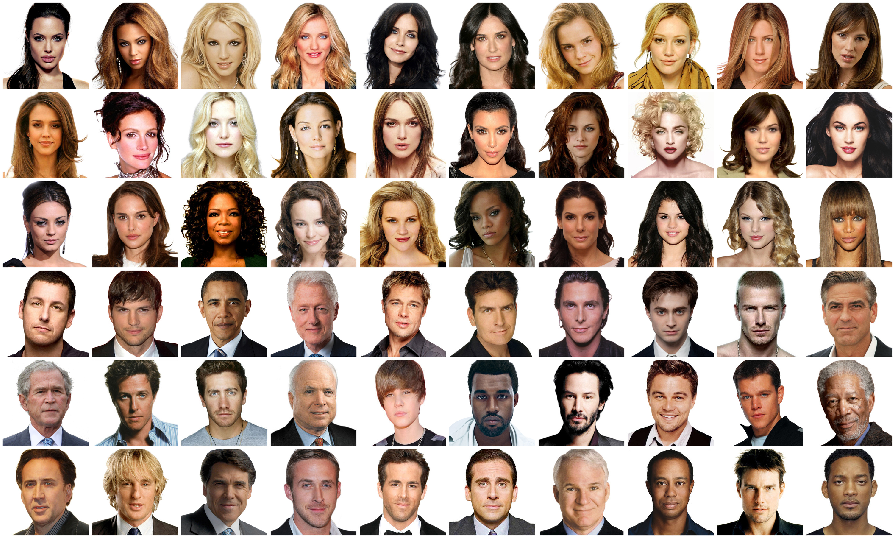

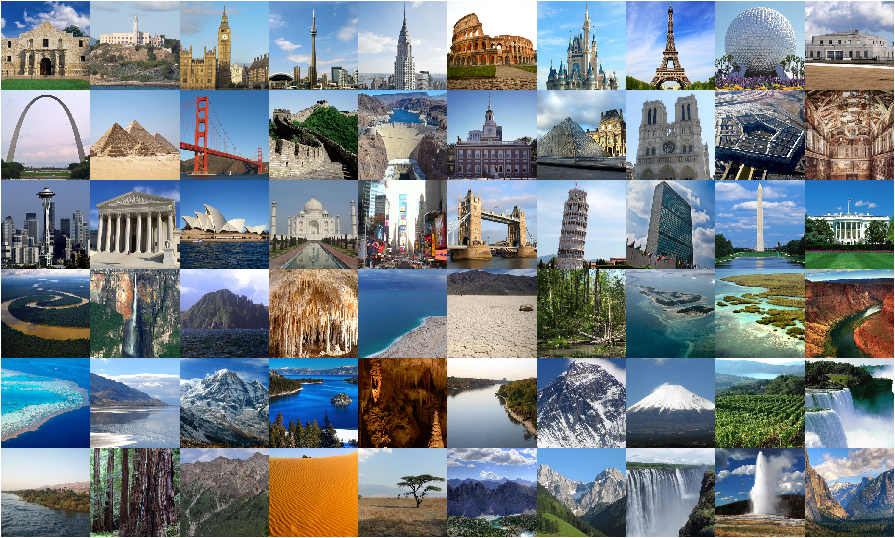

In [4]:
for category in ['face', 'scene']:
    mat = dsmplot.image_matrix(images[category], shape=(6, 10))
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(mat)
    ax.set_axis_off()
    fig.savefig(os.path.join(fig_model, f'stim_matrix_{category}.jpg'))

## Models of dissimilarity

In [6]:
model_names = ['hmax', 'subcat', 'wiki_w2v', 'wiki_use1', 'vem', 'sem', 'geo']
model_labels = ['hmx', 'sub', 'w2v', 'use', 'vem', 'sem', 'geo']
models = model.load_model_set(
    model_dir, model_names, model_labels=model_labels
)

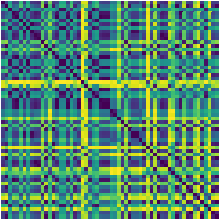

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
for category, mod in models.items():
    for name, rdm in mod.items():
        if np.any(np.isnan(rdm)):
            continue
        dsmplot.plot_dsm(rdm, rank=True, prange=(1, 99), ax=ax)
        ax.set_axis_off()
        fig.savefig(
            os.path.join(fig_model, f'rdm_{name}_{category}.png'),
            pad_inches=0
        )

## Item features

In [7]:
pool_file = os.path.join(stim_dir, 'stimuli.csv')
face_file = os.path.join(features_dir, 'faces.csv')
scene_file = os.path.join(features_dir, 'scenes.csv')

In [8]:
face_rdms = model.load_face_rdms(face_file, pool_file)
scene_rdms = model.load_scene_rdms(scene_file, pool_file)

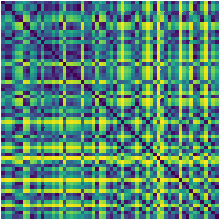

In [9]:
face_names = ['main', 'age']
fig, ax = plt.subplots(figsize=(4, 4))
for name in face_names:
    dsmplot.plot_dsm(face_rdms[name], rank=True, prange=(1, 99), ax=ax)
    ax.set_axis_off()
    fig.savefig(
        os.path.join(fig_model, f'rdm_{name}_face.png'), pad_inches=0
    )

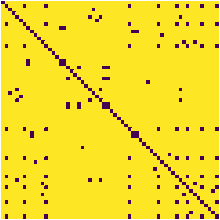

In [10]:
scene_names = ['type', 'year', 'region', 'state']
fig, ax = plt.subplots(figsize=(4, 4))
for name in scene_names:
    dsmplot.plot_dsm(scene_rdms[name], rank=True, prange=(1, 99), ax=ax)
    ax.set_axis_off()
    fig.savefig(
        os.path.join(fig_model, f'rdm_{name}_scene.png'), pad_inches=0
    )

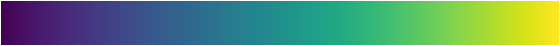

In [11]:
a = np.tile(np.arange(1024), (80, 1))
fig, ax = plt.subplots(figsize=(10, 1))
ax.matshow(a)
ax.set_axis_off()
fig.savefig(os.path.join(fig_model, 'colorbar.png'), pad_inches=0)

## MDS plots

In [9]:
images = task.read_image_sets(
    pool, os.path.join(stim_dir, 'main_180_alpha')
)

In [7]:
model_names = ['sem', 'vem', 'w2v', 'use', 'hmx']
dsm_set = [models['face'][name] for name in model_names]
aligned = dsmplot.embed_mds_align(dsm_set)

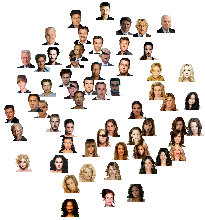

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
for name, rep in zip(model_names, aligned):
    ax.clear()
    dsmplot.plot_mds(
        rep.T, images['face'], zoom=0.06, ax=ax, embedding='precomputed'
    )
    ax.set_axis_off()
    ax.set_aspect('equal')
    fig.savefig(
        os.path.join(fig_model, f'mds_{name}_face.png'), pad_inches=0,
        dpi=300
    )

In [15]:
model_names = ['sem', 'vem', 'w2v', 'use', 'hmx', 'geo']
dsm_set = [models['scene'][name] for name in model_names]
aligned = dsmplot.embed_mds_align(dsm_set)

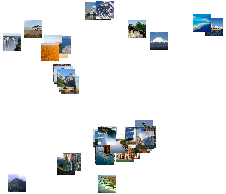

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
for name, rep in zip(model_names, aligned):
    ax.clear()
    dsmplot.plot_mds(
        rep.T, images['scene'], zoom=0.06, ax=ax, embedding='precomputed'
    )
    ax.set_axis_off()
    ax.set_aspect('equal')
    fig.savefig(
        os.path.join(fig_model, f'mds_{name}_scene.png'),
        pad_inches=0, dpi=300
    )

## Schematic matrices

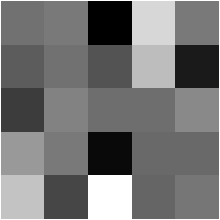

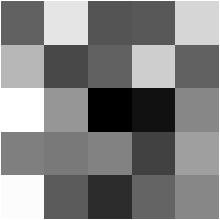

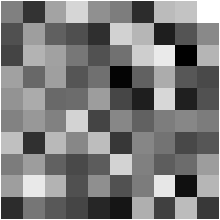

In [23]:
for i in range(1, 3):
    fig, ax = plt.subplots(figsize=(4, 4))
    mat = np.random.normal(size=(5, 5))
    dsmplot.plot_pattern(mat, ax=ax)
    fig.savefig(
        os.path.join(fig_schematic, f'pattern_a{i}.png'), pad_inches=0
    )
    
fig, ax = plt.subplots(figsize=(4, 4))
mat = np.random.normal(size=(10, 10))
dsmplot.plot_pattern(mat, ax=ax)
fig.savefig(os.path.join(fig_schematic, 'pattern_sl.png'), pad_inches=0)

## Location maps

In [24]:
#world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = gpd.read_file(os.path.join(stim_dir, 'world.json'))
country = gpd.read_file(os.path.join(stim_dir, 'gz_2010_us_040_00_500k.json'))
lakes = gpd.read_file(os.path.join(stim_dir, 'lakes.json'))

In [25]:
model_file = os.path.join(model_dir, f'mat_geo.mat')
mat = io.loadmat(model_file)
vectors = mat['vectors'][60:, :]

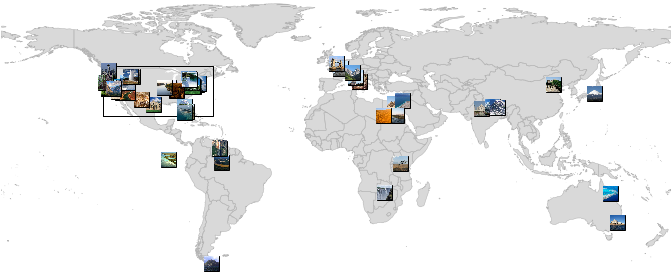

In [26]:
back_color = (.85, .85, .85)
line_color = (.7, .7, .7)

fig, ax = plt.subplots(figsize=(12, 6))

# background
world.plot(ax=ax, color=back_color)
lakes.plot(ax=ax, color='w')
world.boundary.plot(ax=ax, color=line_color, linewidth=.5)

# US box
polygon = Polygon(
    [
        (-125.5, 23.5),
        (-125.5, 50),
        (-66.5, 50),
        (-66.5, 23.5),
        (-125, 23.5)
    ]
)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
poly_gdf.boundary.plot(ax=ax, color='k')

# pictures
dsmplot.image_scatter(
    vectors[:, 1], vectors[:, 0], images['scene'], zoom=.05, frameon=True
)
ax.set_axis_off()
ax.set(xlim=(-180, 180), ylim=(-62, 85))
fig.savefig(
    os.path.join(fig_model, 'map_world.png'), pad_inches=0, dpi=300
)

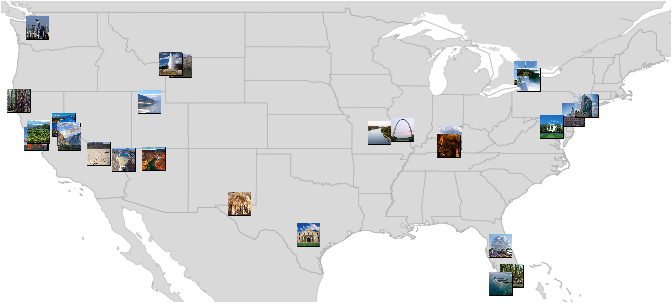

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

# world boundaries
world.plot(ax=ax, color=back_color)
world.boundary.plot(ax=ax, color=line_color, linewidth=.5)

# state boundaries
country.plot(ax=ax, color=back_color)
country.boundary.plot(ax=ax, color=line_color, linewidth=.5)
lakes.plot(ax=ax, color='w')

# pictures
dsmplot.image_scatter(
    vectors[:, 1], vectors[:, 0], images['scene'], zoom=.075,
    frameon=True
)
ax.set(xlim=(-125.5, -66.5), ylim=(23.5, 50))
ax.set_axis_off()
fig.savefig(
    os.path.join(fig_model, 'map_usa.png'), pad_inches=0, dpi=300
)